In [1]:
import interactome as I

In [2]:
ixome = I.Interactome(I.PATH + I.INTERACTOME_FILE)

In [3]:
schiz_genes = []
with open("./disease-genes/schizophrenia.txt") as f:
    for line in f:
        schiz_genes.append(int(line.strip()))

In [4]:
cnt = 0
schiz_genes_in_ixome = []
for gene in schiz_genes:
    if not ixome.G.has_node(gene):
        cnt += 1
        print(f"gene {gene} not in ixome")
    else:
        schiz_genes_in_ixome.append(gene)

gene 6365 not in ixome
gene 8401 not in ixome
gene 8806 not in ixome
gene 6377 not in ixome
gene 8400 not in ixome
gene 100196913 not in ixome
gene 100329170 not in ixome
gene 404686 not in ixome
gene 619488 not in ixome
gene 6378 not in ixome
gene 63944 not in ixome
gene 4095 not in ixome
gene 27184 not in ixome
gene 3782 not in ixome
gene 282706 not in ixome
gene 100188832 not in ixome
gene 154664 not in ixome
gene 29801 not in ixome
gene 319100 not in ixome
gene 449489 not in ixome
gene 4096 not in ixome
gene 338386 not in ixome
gene 64067 not in ixome
gene 89832 not in ixome
gene 90273 not in ixome
gene 140805 not in ixome
gene 4963 not in ixome
gene 50971 not in ixome
gene 5816 not in ixome
gene 80833 not in ixome
gene 6899 not in ixome


In [5]:
schiz_graph = ixome.G.subgraph(schiz_genes_in_ixome)

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

nx.draw(schiz_graph, node_size=10)

In [8]:
def get_disease_genes(disease):
    disease_genes = []
    disease_genes_in_ixome = []
    disease_genes_excluded = []
    with open(f"./disease-genes/{disease}.txt") as f:
        for line in f:
            gene = int(line.strip())
            disease_genes.append(gene)
            if not ixome.G.has_node(gene):
                disease_genes_excluded.append(gene)
                print(f"gene {gene} not in ixome")
            else:
                disease_genes_in_ixome.append(gene)
    
    return disease_genes, disease_genes_in_ixome, disease_genes_excluded

In [8]:
bipolar_genes, bipolar_ixome, bipolar_not_ixome = get_disease_genes("bipolar")

gene 4095 not in ixome
gene 4096 not in ixome
gene 100188792 not in ixome
gene 100126593 not in ixome
gene 100196917 not in ixome
gene 100196912 not in ixome
gene 100188844 not in ixome
gene 8401 not in ixome
gene 100188843 not in ixome
gene 154664 not in ixome
gene 6365 not in ixome
gene 282706 not in ixome
gene 8806 not in ixome
gene 3782 not in ixome
gene 10386 not in ixome
gene 50979 not in ixome
gene 431708 not in ixome
gene 9030 not in ixome
gene 92126 not in ixome
gene 94313 not in ixome
gene 6377 not in ixome
gene 284111 not in ixome
gene 100196913 not in ixome
gene 339896 not in ixome
gene 2558 not in ixome
gene 134860 not in ixome
gene 266722 not in ixome
gene 753 not in ixome
gene 1243 not in ixome
gene 387572 not in ixome
gene 345193 not in ixome
gene 619493 not in ixome
gene 100188832 not in ixome
gene 50948 not in ixome
gene 677663 not in ixome
gene 30813 not in ixome
gene 128408 not in ixome
gene 133584 not in ixome


In [9]:
len(bipolar_ixome), len(bipolar_genes)

(70, 108)

In [134]:
bipolar_genes, bipolar_ixome, bipolar_not_ixome = get_disease_genes("bipolar")
schizophrenia_genes, schizophrenia_ixome, _ = get_disease_genes("schizophrenia")
autism_genes, autism_ixome, _ = get_disease_genes("autism")

gene 4095 not in ixome
gene 4096 not in ixome
gene 100188792 not in ixome
gene 100126593 not in ixome
gene 100196917 not in ixome
gene 100196912 not in ixome
gene 100188844 not in ixome
gene 8401 not in ixome
gene 100188843 not in ixome
gene 154664 not in ixome
gene 6365 not in ixome
gene 282706 not in ixome
gene 8806 not in ixome
gene 3782 not in ixome
gene 10386 not in ixome
gene 50979 not in ixome
gene 431708 not in ixome
gene 9030 not in ixome
gene 92126 not in ixome
gene 94313 not in ixome
gene 6377 not in ixome
gene 284111 not in ixome
gene 100196913 not in ixome
gene 339896 not in ixome
gene 2558 not in ixome
gene 134860 not in ixome
gene 266722 not in ixome
gene 753 not in ixome
gene 1243 not in ixome
gene 387572 not in ixome
gene 345193 not in ixome
gene 619493 not in ixome
gene 100188832 not in ixome
gene 50948 not in ixome
gene 677663 not in ixome
gene 30813 not in ixome
gene 128408 not in ixome
gene 133584 not in ixome
gene 6365 not in ixome
gene 8401 not in ixome
gene 8806

In [13]:
def get_disease_subgraph(disease_genes, ixome):
    return ixome.G.subgraph(disease_genes)

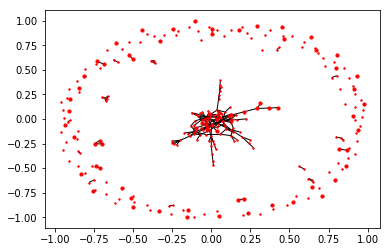

In [131]:
bipolar_module = get_disease_subgraph(bipolar_ixome, ixome)

nx.draw_networkx(bipolar_module, with_labels=False, node_size=10)

combined = list(set().union(bipolar_ixome, schizophrenia_ixome, autism_ixome))

all_diseased = get_disease_subgraph(combined, ixome)
nx.draw_networkx(all_diseased, with_labels=False, node_size=2)


In [64]:
import os
import mygene
import pandas as pd

def generate_significant_ids(textfile):
    m = mygene.MyGeneInfo()
    PATH = os.getcwd()
    sig_gene_pairs_file = os.path.join(PATH, 'tissue-genes-and-snps', textfile)
#    sig_gene_pairs_file = PATH + "/tissue-genes-and-snps/Heart_Atrial_Appendage.signifpairs.txt"

    #sig_gene_pairs_file = PATH + "/tissue-genes-and-snps/Brain_Hippocampus.v7.signif_variant_gene_pairs.txt"

    gene_names = PATH + "/gene-map/geneids.txt" # source: https://www.genenames.org/download/custom/+
    gene_map = pd.read_csv(gene_names, sep="\t")

    hippocampus_genes = pd.read_csv(sig_gene_pairs_file, sep="\t")
  #  hippocampus_genes = hippocampus_genes[hippocampus_genes.pval_nominal < 1e-6]
    unique_hc_genes = list(map(lambda x: x.split(".")[0], set(hippocampus_genes["gene_id"])))
    gene_info = m.getgenes(unique_hc_genes)
    hc_genes_sig = []
    k = 'entrezgene'
    for info in gene_info:
        if( k in info.keys()):
            hc_genes_sig.append(int(info[k]))
    return(hc_genes_sig)

In [65]:
sig_brain = generate_significant_ids("Brain_Hippocampus.v7.signif_variant_gene_pairs.txt")
sig_liver = generate_significant_ids("Liver.signifpairs.txt")

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-3249...done.
querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.


In [141]:
def wrapper_func(ixome, n1, n2):
    try:
        return(nx.shortest_path_length(ixome.G, n1, n2))
    except nx.NetworkXNoPath:
        return(float('inf'))
        

def nodes_distance(ixome, gene_list):
    avg_distances_lst = []
    min_distances_lst = []
    num_no_path = 0
    for i in range(0, len(gene_list)):
        cant_find = []
        distances = []
        others = gene_list[:i] + gene_list[i+1:]
        for g in others:
            d = wrapper_func(ixome, gene_list[i], g)
            if(d == float('inf')):
                cant_find.append(g)
            else:
                distances.append(d)
        if(len(distances) == 0):
            num_no_path += 1
        else:
            avg = sum(distances) / len(distances)
            min_d = min(distances)
            avg_distances_lst.append(avg)
            min_distances_lst.append(min_d)
    return(avg_distances_lst, min_distances_lst, num_no_path)
        

In [142]:
def find_distances(disease_ixome, ixome):
    disease_module = get_disease_subgraph(disease_ixome, ixome)
    shown_brain = list(set(disease_module).intersection(set(sig_brain)))

    shown_liver= list(set(disease_module).intersection(set(sig_liver)))
    a = nodes_distance(ixome, shown_liver)
    b =  nodes_distance(ixome, shown_brain)
    
    res = {}
    res['liver'] = a
    res['brain'] = b
    return(res)
 


In [143]:
data = {}
data['autism'] = find_distances(autism_ixome, ixome)
data['schizophrenia'] = find_distances(schizophrenia_ixome, ixome)
data['bipolar'] = find_distances(bipolar_ixome, ixome)
print(data)

{'autism': {'liver': ([3.75, 3.75, 3.5, 4.25, 3.25], [3, 3, 3, 4, 3], 0), 'brain': ([3.25, 2.75, 3.25, 2.75, 2.5], [3, 2, 3, 2, 2], 0)}, 'schizophrenia': {'liver': ([3.1578947368421053, 3.0, 4.105263157894737, 3.473684210526316, 3.210526315789474, 3.3157894736842106, 3.210526315789474, 2.789473684210526, 3.6315789473684212, 3.0, 2.3157894736842106, 3.0526315789473686, 3.6842105263157894, 3.0526315789473686, 3.789473684210526, 3.0526315789473686, 3.210526315789474, 3.3157894736842106, 3.1578947368421053, 3.3157894736842106], [2, 2, 3, 3, 2, 2, 2, 2, 3, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2], 2), 'brain': ([3.176470588235294, 4.235294117647059, 3.764705882352941, 2.9411764705882355, 3.764705882352941, 3.7058823529411766, 3.764705882352941, 2.9411764705882355, 4.117647058823529, 2.823529411764706, 3.5294117647058822, 3.235294117647059, 3.5294117647058822, 3.235294117647059, 3.0, 3.2941176470588234, 3.235294117647059, 3.0], [2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2], 1)}, 'bipolar': 

In [23]:
#for cc in nx.connected_components(bipolar_module):
   # print(len(cc))

In [24]:
#for cc in nx.connected_components(schiz_graph):
    #print(len(cc))

In [ ]:
bipolar_module.edges()

In [ ]:
schiz_graph.edges()